# Отображение географических данных с помощью Basemap

Визуализация географических данных — распространенный вид визуализации в науке о данных. Для этой цели предназначена утилита библиотеки Matplotlib — набор программ Basemap, расположенных в пространстве имен mpl_toolkits. Правда, Basemap несколько неудобен в использовании, и даже простые изображения визуализируются дольше, чем хотелось бы. Для более ресурсоемких визуализаций карт, возможно, подойдут более современные решения, такие как библиотека Leaflet или картографический API Google. Тем не менее Basemap — инструмент, который не помешает иметь в запасе пользователям языка Python. В этом разделе мы продемонстрируем несколько примеров, возможных благодаря этому набору инструментов визуализаций карт.

In [1]:
# Установим Basemap
# !pip install basemap 
# Установим Pillow
# !pip install pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


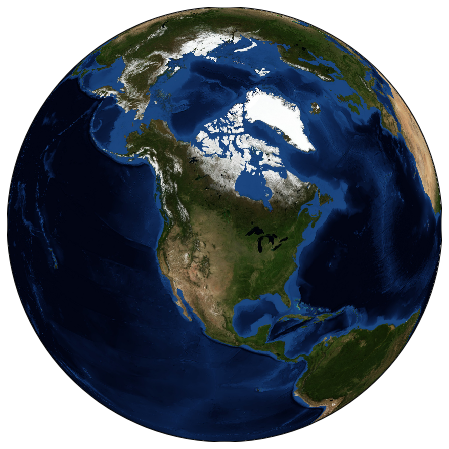

In [3]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Удобнее всего то, что отображаемая на рисунке сфера — не просто изображение, это полнофункциональная система координат Matplotlib, понимающая сферические координаты и позволяющая легко дорисовывать данные на карту! Например, можно взять другую картографическую проекцию, посмотреть на крупный план Северной Америки и нарисовать местоположение Сиэтла. Мы воспользуемся изображением на основе набора данных etopo (отражающим топографические элементы как на поверхности земли, так и находящиеся под океаном) в качестве фона карты:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


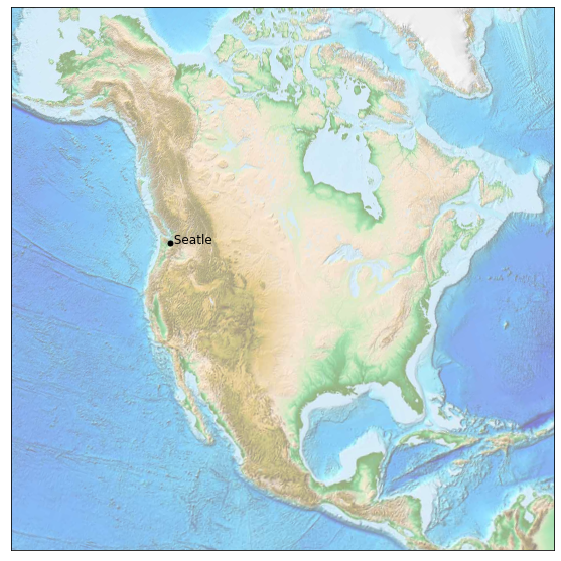

In [4]:
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

# проецируем кортеж (долгота, широта) на координаты (x, y)
# для построения графика
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seatle', fontsize=12);

Приведенный пример позволил нам взглянуть на то, какие географические визуализации возможны с помощью всего нескольких строк кода на языке Python. Теперь мы обсудим возможности набора инструментов Basemap более детально и рассмотрим несколько примеров визуализации картографических данных. Пользуясь этими примерами как готовыми блоками, вы сможете создавать практически любые картографические визуализации.

## Картографические проекции

Первое, с чем нужно определиться при использовании карт, — какую проекцию использовать. Вероятно, вы знаете, что сферическую карту, например карту Земли, невозможно отобразить на плоскости без некоторого ее искажения или нарушения связности. На протяжении истории человечества было разработано много таких проекций, так что у вас есть из чего выбирать! В зависимости от предполагаемого применения конкретной картографической проекции бывает удобно сохранить определенные свойства карты (например, пространственные направления, площадь, расстояние, форму и т. д.).

Пакет Basemap реализует несколько десятков таких проекций, на которые можно сослаться с помощью короткого кода формата. Мы продемонстрируем наиболее часто используемые среди них.

Начнем с описания удобных утилит, предназначенных для отрисовки нашей карты мира с линиями долготы и широты:

In [5]:
from itertools import chain
def draw_map(m, scale=0.2):
    # Отрисовываем изображение с оттененным рельефом
    m.shadedrelief(scale=scale)
    
    # Значение широты и долготы возвращаются в виде словаря
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # Ключи, содержащие экземпляры класса plt.Line2D
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # Выполняем цикл по этим линиям, устанавливая нужный стиль
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Цилиндрические проекции

Простейшие из картографических проекций — цилиндрические, в которых линии одинаковой широты и долготы проецируются на горизонтальные и вертикальные линии соответственно. Такой тип проекции хорошо подходит для отображения областей у экватора, но приводит к сильной дисторсии возле полюсов. В различных цилиндрических проекциях расстояния между линиями широты различаются, что приводит к различной степени сохранения пропорций и дисторсии в районе полюсов. На рис. ниже показан пример равнопромежуточной цилиндрической проекции (equidistant cylindrical projection), характеризующейся выбором такого масштабирования широты, при котором расстояния вдоль меридианов остаются неизменными. Среди других цилиндрических проекций — проекция Меркатора (projection='merc') и равновеликая цилиндрическая проекция (equal-area cylindrical projection).

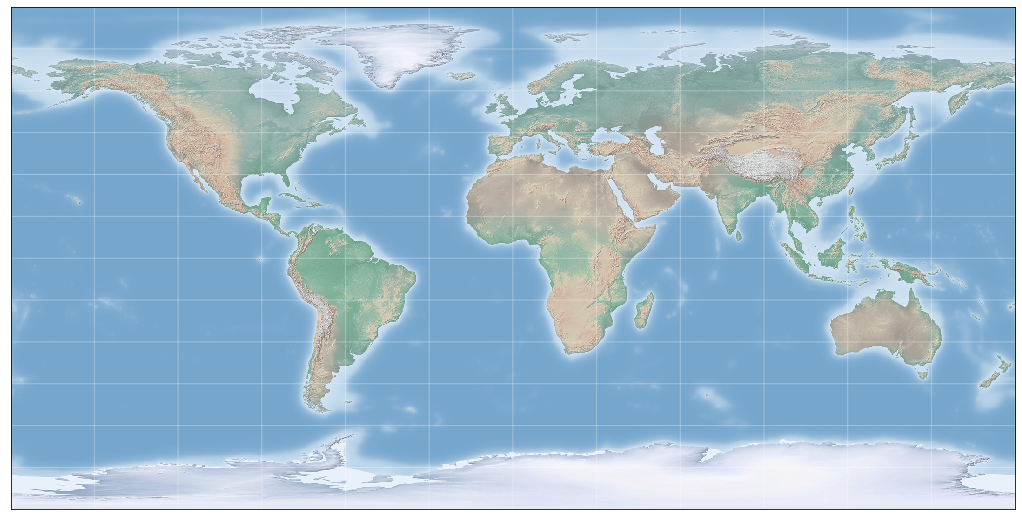

In [6]:
fig = plt.figure(figsize=(18, 12), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

Передаваемые в Basemap дополнительные аргументы для этого представления задают широту (lat) и долготу (lon) нижнего левого (llcrnr) и верхнего правого (urcrnr) углов карты в градусах.

### Псевдоцилиндрические проекции

В псевдоцилиндрических проекциях отсутствует требование вертикальности меридианов (линии одинаковой долготы), это позволяет улучшить показатели возле полюсов проекции. Проекция Мольвейде (projection='moll') — распространенный пример псевдоцилиндрической проекции, в которой все меридианы представляют собой эллиптические дуги. Она разработана с целью сохранения пропорций на всей площади карты: хотя имеются некоторые дисторсии около полюсов, мелкие участки отображаются правдоподобно. В числе других псевдоцилиндрических проекций — синусоидальная проекция (projection='sinu') и проекция Робинсона (projection='robin').

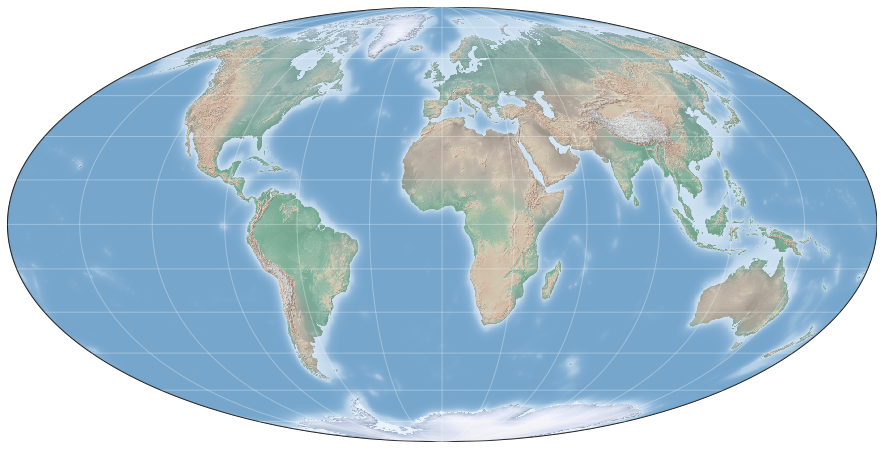

In [7]:
fig = plt.figure(figsize=(18, 8), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

Передаваемые в Basemap дополнительные аргументы относятся к широте (lat_0) и долготе (lon_0) центра карты.

### Перспективные проекции

Перспективные проекции создаются путем выбора конкретной главной точки, аналогично фотографированию Земли из конкретной точки пространства (в некоторых проекциях эта точка формально находится внутри Земли!). Распространенный пример — ортографическая проекция (projection='ortho'), показывающая одну сторону земного шара так, как его бы видел наблюдатель с очень большого расстояния. Таким образом, при ней можно видеть одновременно только половину земного шара. Среди других перспективных проекций — гномоническая (projection='gnom') и стереографическая (projection='stere') проекции. Они лучше всего подходят для отображения небольших участков карты.

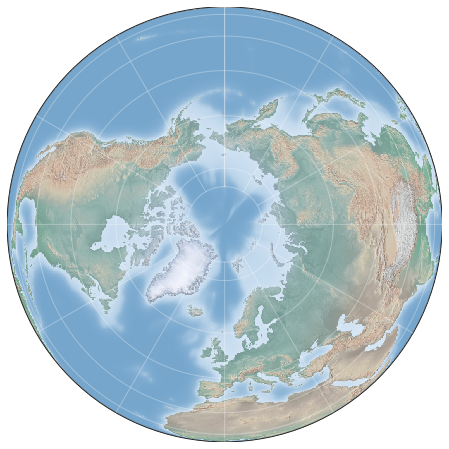

In [8]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=90, lon_0=0)
draw_map(m);

### Конические проекции

При конических проекциях карта проецируется на конус, который затем разворачивается. Такой способ позволяет получить отличные локальные характеристики, но удаленные от точки фокуса конуса области могут оказаться сильно искаженными. Один из примеров таких проекций — равноугольная коническая проекция Ламберта (projection='lcc'), которую мы уже видели в карте Северной Америки. При ее использовании карта проецируется на конус, устроенный таким образом, чтобы сохранялись расстояния на двух стандартных параллелях (задаваемых в Basemap с помощью аргументов lat_1 и lat_2), в то время как между ними масштаб был меньше реального, а за их пределами — больше реального. Другие удобные конические проекции — равнопромежуточная коническая проекция (projection='eqdc') и равновеликая коническая проекция Альберса (projection='aea'). Конические проекции, как и перспективные проекции, хорошо подходят для отражения маленьких и средних кусков земного шара.

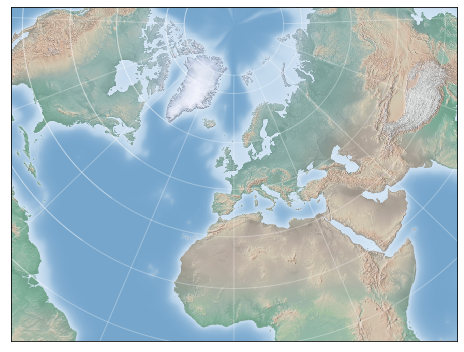

In [9]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, lon_0=0, lat_0=50, lat_1=45, lat_2=55, width=1.6E7, height=1.2E7)
draw_map(m);

### Другие проекции

Если вы собираетесь часто иметь дело с картографическими визуализациями, рекомендую почитать и о других проекциях, их свойствах, преимуществах и недостатках. Скорее всего, они имеются в пакете Basemap (http://matplotlib.org/basemap/users/mapsetup.html). Окунувшись в этот вопрос, вы обнаружите поразительную субкультуру фанатов геовизуализаций, яростно отстаивающих преимущество их излюбленной проекции для любого приложения!

## Отрисовка фона карты

Ранее мы рассмотрели методы bluemarble() и shadedrelief(), предназначенные для проекций изображений всего земного шара на карту, а также методы drawparallels() и drawmeridians()для рисования линий с постоянной широтой или долготой. Пакет Basemap содержит множество удобных функций для рисования границ физических объектов, например континентов, океанов, озер и рек, а также политических границ — границ стран или штатов/округов США. Далее приведены некоторые из имеющихся функций рисования, возможно, вы захотите изучить их подробнее с помощью справочных средств оболочки IPython.

- Физические границы и водоемы:
- - drawcoastlines() — рисует континентальные береговые линии;
- - drawlsmask() — рисует маску «земля/море» с целью проекции изображений на то или другое;
- - drawmapboundary() — рисует границы на карте, включая заливку цветом океанов;
- - drawrivers() — рисует реки на карте;
- - fillcontinents() — заливает пространство континентов заданным цветом; в качестве дополнительной настройки может залить озера другим цветом.
- Политические границы:
- - drawcountries() — рисует границы стран;
- - drawstates() — рисует границы штатов США;
- - drawcounties() — рисует границы округов США.
- Свойства карты:
- - drawgreatcircle() — рисует большой круг между двумя точками;
- - drawparallels() — рисует линии с постоянной широтой (меридианы);
- - drawmeridians() — рисует линии с постоянной долготой (параллели);
- - drawmapscale() — рисует на карте линейную шкалу масштаба.
- Изображения всего земного шара:
- - bluemarble() — проецирует сделанную NASA фотографию «голубого шарика» на карту;
- - shadedrelief() — проецирует на карту изображение с оттененным рельефом;
- - etopo() — рисует на карте изображение рельефа на основе набора данных etopo;
- - warpimage() — проецирует на карту пользовательское изображение.

Для объектов с границами необходимо при создании изображения Basemap задать желаемое разрешение. Аргумент resolution класса Basemap задает уровень детализации границ ('c' (от англ. crude) — грубая детализация, 'l' (от англ. low) — низкая детализация, 'i' (от англ. intermediate) — средняя детализация, 'h' (от англ. high) — высокая детализация, 'f' (от англ. full) — полная детализация, или None — если границы не используются). Выбор значения этого параметра очень важен. Например, отрисовка границ с высоким разрешением на карте земного шара может происходить очень медленно.

Вот пример отрисовки границ «земля/море» и влияние на нее параметра разрешения. Мы создадим карту шотландского острова Скай как с низким, так и с высоким разрешением. Остров расположен в точке с координатами 57,3 °N, 6,2 °W, карта размером 90 000 × 120 000 км прекрасно его демонстрирует:

C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


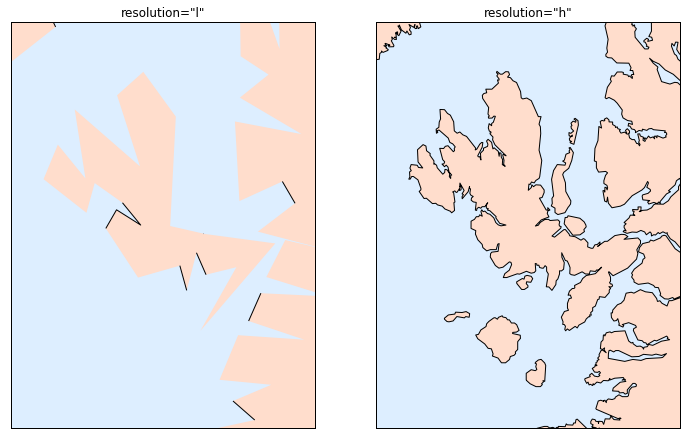

In [11]:
# нужно установить пакеты высоких разрешений - conda install basemap-data-hires

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title('resolution="{0}"'.format(res));

Обратите внимание, что при низком разрешении береговые линии на этом уровне масштабирования отображаются некорректно, а при высоком — достаточно хорошо. Однако низкое разрешение отлично подходит для глобального представления и работает гораздо быстрее, чем загрузка данных по границам в высоком разрешении для всего земного шара. Может потребоваться немного поэкспериментировать с разрешением для конкретного представления, чтобы найти нужное, лучше всего начать с быстро отрисовываемого графика с низким разрешением и наращивать разрешение по мере необходимости.

## Нанесение данных на карты

Вероятно, самая полезная на практике возможность набора инструментов Basemap — умение наносить разнообразные данные поверх фонового изображения карты. Для построения простых диаграмм и текста на картах подойдет любая из функций plt. Чтобы нанести данные на карту с помощью plt, можно воспользоваться для проекции координат широты и долготы на координаты (X, Y) экземпляром класса Basemap, как мы уже делали ранее в примере с Сиэтлом.

Помимо этого, среди методов экземпляра Basemap имеется множество функций, специально предназначенных для работы с картами. Они работают очень схоже со своими аналогами из библиотеки Matplotlib, но принимают дополнительный булев аргумент latlon, позволяющий (при равном True значении) передавать им исходные значения широты и долготы, а не их проекции на координаты (X, Y) .

Вот некоторые из методов, специально предназначенных для работы с картами:

- contour()/contourf() — рисует контурные линии или заполненные контуры;
- imshow() — отображает изображение;
- pcolor() / pcolormesh() — рисует псевдоцветной график для нерегулярных и регулярных сеток;
- plot() — рисует линии и/или маркеры;
- scatter() — рисует точки с маркерами;
- quiver() — рисует вектора;
- barbs() — рисует стрелки ветра;
- drawgreatcircle() — рисует большой круг1.

Мы рассмотрим примеры некоторых из этих функций далее. Дальнейшую информацию о них, включая примеры графиков, можно найти в онлайн-документации Basemap.

## Пример: города Калифорнии

В разделе «Пользовательские настройки легенд на графиках» данной главы было продемонстрировано использование размера и цвета точек на диаграмме рассеяния при передаче информации о расположении, размере и населении городов штата Калифорния. Здесь же мы воссоздадим этот график, но с использованием Basemap для включения данных в соответствующий картографический контекст.

Начнем, как и раньше, с загрузки данных:

In [13]:
import pandas as pd
cities = pd.read_csv('CSV/california_cities.csv')

# Извлекаем интересующие нас данные
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

Настраиваем проекцию карты, наносим данные, после чего создаем шкалу цветов и легенду:

C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\RusancovS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


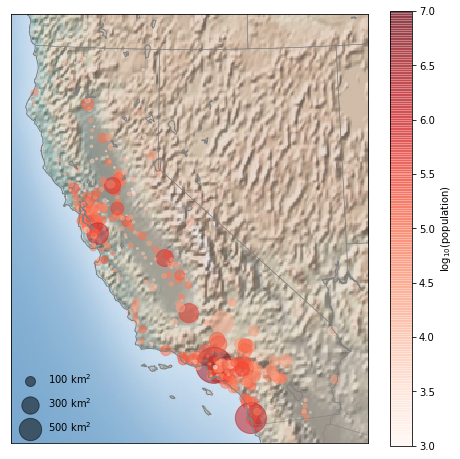

In [14]:
# 1. Рисуем фон карты
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. Наносим данные по городам, отражая население разными цветами, а площадь - разными размерами точек
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area, cmap='Reds', alpha=0.5)

# 3. Создаем шкалу цветов и легенду
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 4. Делаем легенду с фиктивными точками
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

Этот график демонстрирует приблизительно, в каких местах Калифорнии живет большое количество людей: они сосредоточены на побережье в районе Лос-Анджелеса и Сан-Франциско, по бокам шоссе в Центральной долине, избегая практически полностью гористых районов на границах штата.